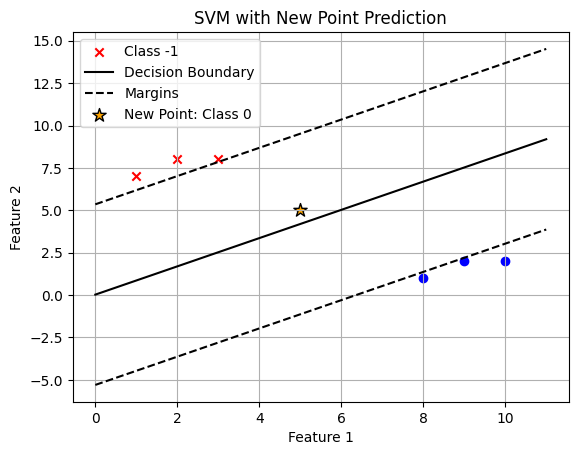

New point [5 5] classified as: Class 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        y = np.where(y <= 0, -1, 1) # Convert labels to -1 and 1
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b += self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

    def visualize(self, X, y, new_point=None, prediction=None):
        def get_hyperplane(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        # Plot existing data points
        for i, sample in enumerate(X):
            if y[i] == 1:
                plt.scatter(sample[0], sample[1], marker='o', color='blue', label='Class +1' if i == 0 else "")
            else:
                plt.scatter(sample[0], sample[1], marker='x', color='red', label='Class -1' if i == 0 else "")

        # Plot decision boundary
        x0 = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
        x1 = get_hyperplane(x0, self.w, self.b, 0)
        x1_m = get_hyperplane(x0, self.w, self.b, -1)
        x1_p = get_hyperplane(x0, self.w, self.b, 1)

        ax.plot(x0, x1, 'k-', label='Decision Boundary')
        ax.plot(x0, x1_m, 'k--', label='Margins')
        ax.plot(x0, x1_p, 'k--')

        # Plot the new point
        if new_point is not None:
            color = 'green' if prediction == 1 else 'orange'
            label = f'New Point: Class {"1" if prediction == 1 else "0"}'
            plt.scatter(new_point[0], new_point[1], c=color, s=100, edgecolors='black', label=label, marker='*')

        ax.legend()
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title("SVM with New Point Prediction")
        plt.grid(True)
        plt.show()


# 🚀 Example usage
if __name__ == "__main__":
    # Training data
    X = np.array([
        [1, 7],
        [2, 8],
        [3, 8],
        [8, 1],
        [9, 2],
        [10, 2]
    ])
    y = np.array([0, 0, 0, 1, 1, 1]) # 0 -> -1, 1 -> +1

    # New point to classify
    new_point = np.array([[5, 5]])

    # Train and predict
    svm = SVM()
    svm.fit(X, y)
    prediction = svm.predict(new_point)[0]

    # Visualize
    svm.visualize(X, y, new_point=new_point[0], prediction=prediction)

    # Print prediction
    print(f"New point {new_point[0]} classified as: {'Class 1' if prediction == 1 else 'Class 0'}")
